In [1]:
from sympy import *
import random
from sympy.combinatorics.named_groups import SymmetricGroup
init_printing()
from sympy.physics.quantum.dagger import Dagger
from sympy.functions import Abs

In [34]:
def randMatrixC(r,c,min=0,max=1,seed=[]):
    """Create random matrix r x c with complex entries"""
    if seed == []:
        prng = random.Random()  # use system time
    else:
        prng = random.Random(seed)
    return Matrix(r,c,lambda i,j: prng.randint(min,max)+I*prng.randint(min,max))

In [12]:
def MTS(A):
    """Calcula una matriz triangular superior"""
    A1=A
    n=A.shape[0]
    V=eye(n)
    for i in range(0,n):
        C=eye(n)
        C[i,i]=1/sqrt(A1[i,i])
        for j in range(i+1,n):
            C[i,j] = -(1/A1[i,i])*A1[i,j]
        V=V*C
        V.simplify()
        A1=Dagger(C)*A1*C
        A1.simplify()
    return V

In [17]:
A=zeros(2,2)
A[0,0]=2
A[0,1]=1
A[1,0]=1
A[1,1]=2
A,MTS(A)

In [11]:
A=randMatrixC(6,6)
B=Dagger(A)*A
B.simplify()
B

In [12]:
C=MTS(B)
C

In [13]:
J=Dagger(C)*B*C
J.simplify()
J

In [13]:
def regular_representation(G):
    elems = list(G.elements)
    n = len(elems)
    def char_function(i, j):
        if elems[i]*g == elems[j]:
            return 1
        else:
            return 0
    mydict = {}
    for g in elems:
        mydict[g] = Matrix(n, n, char_function)
    return mydict
G=SymmetricGroup(3)

In [15]:
for g in regular_representation(G):
    display(regular_representation(G)[g])

In [81]:
for g in range(0,G.order()):
    print (list(G.elements)[g])

(1 2)
(0 2 1)
(2)(0 1)
(2)
(0 2)
(0 1 2)


In [56]:
A=zeros(6,6)
for g in D:
    J=Dagger(D[g])*D[g]
    J.simplify()
    A=J+A
C=MTS(A)
M= (C.inv())*D[G[0]]*C

Matrix([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]])


In [14]:
def unit(G):
    D=regular_representation(G)
    n=D[G[0]].shape[0]
    A=zeros(n,n)
    for g in D:
        J=Dagger(D[g])*D[g]
        J.simplify()
        A=J+A
    C=MTS(A)
    M = {}
    for g in list(G.elements):
        M[g]=(C.inv())*D[g]*C
    return M

G=SymmetricGroup(3)
B=unit(SymmetricGroup(3))
print(list(G.elements)[4])
print (B)

(0 1 2)
{Permutation(2): Matrix([
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1]]), Permutation(2)(0, 1): Matrix([
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0]]), Permutation(0, 2, 1): Matrix([
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0]]), Permutation(1, 2): Matrix([
[0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0]]), Permutation(0, 1, 2): Matrix([
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0]]), Permutation(0, 2): Matrix([
[0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]])}


In [15]:
def ME(G,Ers):
    a=G.order()
    E=zeros(a,a)
    R=unit(G)
    for g in R:
        E=E+(Dagger(R[g])*Ers*R[g])
    E=(sympify(1)/a)*E
    return E

In [58]:
ME(SymmetricGroup(3),eye(6))

In [9]:
G=SymmetricGroup(3)
n=G.order()
for i in range(0,n):
    Ers=zeros(n,n)
    for j in range(0,n):
        Ers[i,j]=1
        M=ME(G,Ers)
        for g in regular_representation(G):
            if ((regular_representation(G)[g])*M == M*(regular_representation(G)[g])):
                #print(1)
            else:
                #print(0)

IndentationError: expected an indented block (<ipython-input-9-a69f788548f8>, line 11)

In [96]:
from sympy import Matrix
m = Matrix(4, 4, [6, 5, -2, -3, -3, -1, 3, 3, 2, 1, -2, -3, -1, 1, 5, 5])
#v1=Matrix(1,4, [6, 5, -2, -3])
#v2=Matrix(1,4, [-3, -1, 3, 3])
#v3=Matrix(1,4, [ 2, 1, -2, -3])
#v4=Matrix(1,4, [-1, 1, 5, 5])
#m = Matrix([v1,v2,v3,v4])
#display(m)
#m.row(0)
v=Matrix([m.row(0)])
for g in range(1,4):
    n=Matrix([m.row(g)])
    v=[v,n]
v

In [47]:
from sympy import Matrix
m = Matrix(4, 4, [6, 5, -2, -3, -3, -1, 3, 3, 2, 1, -2, -3, -1, 1, 5, 5])
#v1=Matrix(1,4, [6, 5, -2, -3])
#v2=Matrix(1,4, [-3, -1, 3, 3])
#v3=Matrix(1,4, [ 2, 1, -2, -3])
#v4=Matrix(1,4, [-1, 1, 5, 5])
#m = Matrix([v1,v2,v3,v4])
#display(m)
##########
#m.row(0)
#v1=Matrix([m.row(0)])
#v2=Matrix([m.row(1)])
#v=[v1,v2]
#v.append(v1)
v=[]
for g in range(0,4):
    h=Matrix([m.row(g)])
    v.append(h)
v

(P, Jcells) = m.jordan_cells()
Jcells[0]
Jcells[1]

In [45]:
(P, J) = m.jordan_form()
#J=P.inv()*m*P
P.inv()*m*P
P

In [0]:
for g in regular_representation(G):
    M = P.inverse()*(regular_representation(G)[g])*P
    display(M)

In [38]:
from sympy.matrices import GramSchmidt
L = [Matrix([2,3,5]), Matrix([3,6,2]), Matrix([8,3,6])]
out1 = GramSchmidt(L,true) #True hace que las salidas estén normalizadas
out1[0]

In [21]:
out1

In [69]:
m = Matrix([[2,3,5], [3,6,2], [8,3,6]])
n=m.shape[0]
v=[]
for i in range(0,n):
    h=Matrix([(m.T).row(i)])
    v.append(h)
v1 = GramSchmidt(v,True)
v2=Matrix([v1[0]])
for i in range(1,n):
    v2=Matrix([v2,v1[i]])
v2.T

In [16]:
#Vamos a intentar poner todo junto.
#Despues de la función ME debe ir esto:
G=SymmetricGroup(3)
n=G.order()
for i in range(0,n):
    Ers=zeros(n,n)
    for j in range(0,n):
        Ers[i,j]=1
        M=ME(G,Ers)
#display(M)
#Nos vamos a quedar con una matriz, en este caso con la última M generada que no es escalar, y que además conmuta con cualquier elemento de la representación regular.
#Y procederemos a encontrar la matriz P tal que P^(-1)*M*P=J, donde J es diagonal por bloques.
(P, J) = M.jordan_form()
#P
#Ahora, para que P sea unitaria debemos normalizarla, por ello se utilizará Gramschmidt.
#n=P.shape[0]
#(P.T).row(0)
v=[]
for i in range(0,n):
    h=Matrix([(P.T).row(i)])
    v.append(h)
v1 = GramSchmidt(v,True)
Q=Matrix([v1[0]])
for i in range(1,n):
    Q=Matrix([Q,v1[i]])
Q=Q.T
P, Q

In [17]:
G=SymmetricGroup(3)
n=G.order()
for g in regular_representation(G):
    T=P.inv()*(regular_representation(G)[g])*P
    display(g,T)

In [27]:
#Vamos a revisar con la representación permutación.
from sympy.combinatorics.named_groups import DihedralGroup
def rho(G):
    D={}
    for g in list(G.elements):
        n=max(g)+1
        M=eye(n)
        N=eye(n)
        for i in range(0,n):
            for j in range(0,n):
                N[i,j]=M[g(i),j]
        D[g]=N
    return D
H=DihedralGroup(4)
rho(H)

In [44]:
def unit1(G):
    D=rho(G)
    #n=D[G[0]].shape[0]
    n=4
    A=zeros(n,n)
    for g in D:
        J=Dagger(D[g])*D[g]
        J.simplify()
        A=J+A
    C=MTS(A)
    M = {}
    for g in list(G.elements):
        M[g]=(C.inv())*D[g]*C
    return M

In [66]:
def ME1(G,Ers):
    D=rho(G)
    a=D[G[0]].shape[0]
    E=zeros(a,a)
    R=unit1(G)
    for g in R:
        E=E+(Dagger(R[g])*Ers*R[g])
    E=(sympify(1)/a)*E
    return E

In [67]:
ME1(DihedralGroup(4),eye(4))

In [76]:
#Vamos a intentar poner todo junto.
#Despues de la función ME1 debe ir esto:
H=DihedralGroup(4)
K=rho(H)
#n=K[Permutation(0, 1, 2)].shape[0]
n=4
for i in range(0,n):
    Ers=zeros(n,n)
    for j in range(0,n):
        Ers[i,j]=1
        M=ME1(H,Ers)

#display(M)
#Nos vamos a quedar con una matriz, en este caso con la última M generada que no es escalar, y que además conmuta con cualquier elemento de la representación regular.
#Y procederemos a encontrar la matriz P tal que P^(-1)*M*P=J, donde J es diagonal por bloques.
(P, J) = M.jordan_form()
#P
#Ahora, para que P sea unitaria debemos normalizarla, por ello se utilizará Gramschmidt.
#n=P.shape[0]
#(P.T).row(0)
v=[]
for i in range(0,n):
    h=Matrix([(P).row(i)])
    v.append(h)
v1 = GramSchmidt(v,True)
Q=Matrix([v1[0]])
for i in range(1,n):
    Q=Matrix([Q,v1[i]])
Q=Q.T
M, Q, P

In [77]:
G=DihedralGroup(4)
n=G.order()
for g in rho(G):
    T=P.inv()*(rho(G)[g])*P
    display(g,T)

In [8]:
Abs(-1)

In [7]:
M=eye(10)
M[2,4]=M[4,2]=1
M[6,3]=M[3,6]=1
display(M)

In [22]:
def block(M):
    v=[]
    c1=0
    i=0
    n=M.shape[0]
    while (c1<n):
        c=0
        for j in range(c1,n):
            if (M[i,j]!=0 or M[j,i]!=0):
                if (Abs(i-j)>c):
                    c=Abs(i-j)
        if (c==0):
            v.append(c1)
            c1=c1+1
            i=c1
        else:
            bloques=False
            while (bloques==False):
                bloques=True
                for j in range(c1,c1+c+1):
                    for k in range(c1+c+1,n):
                         if (M[j,k]!=0 or M[k,j]!=0):
                            if (Abs(i-k)>c):
                                c=Abs(i-k)
            v.append(c1+c)
            c1=c1+c+1
            i=c1
    return v

In [29]:
G=list(SymmetricGroup(3).elements)
n=SymmetricGroup(3).order()
g=G[0]
if (g != SymmetricGroup(3).identity()):
    T= P.inv()*(regular_representation(SymmetricGroup(3))[g])*P
    display(block(T))
else:
    T= P.inv()*(regular_representation(SymmetricGroup(3))[G[1]])*P
    display(block(T))

In [25]:
G.identity()

In [1]:
from sympy import *
import random
from sympy.combinatorics.named_groups import SymmetricGroup
init_printing()
from sympy.physics.quantum.dagger import Dagger
from sympy.combinatorics.named_groups import DihedralGroup
from sympy.matrices import Matrix
from sympy.matrices import GramSchmidt
from sympy import BlockMatrix
from sympy import Symbol, I
def ublock(M,N):
    """ublock hace una matriz diagonal por bloques con dos matrices dadas"""
    m=M.shape[0]
    n=N.shape[0]
    l=m+n
    L=zeros(l,l)
    for i in range(l):
        for j in range(l):
            if (i<m and j<m):
                L[i,j]=M[i,j]
            if (i>=m and j>=m):
                L[i,j]=N[i-m,j-m]
    return L
def MTS(A):
    """Calcula una matriz triangular superior"""
    A1=A
    n=A.shape[0]
    V=eye(n)
    for i in range(0,n):
        C=eye(n)
        C[i,i]=1/sqrt(A1[i,i])
        for j in range(i+1,n):
            C[i,j] = -(1/A1[i,i])*A1[i,j]
        V=V*C
        V.simplify()
        A1=Dagger(C)*A1*C
        A1.simplify()
    return V
def regular_representation(G):
    elems = list(G.elements)
    n = len(elems)
    def char_function(i, j):
        if elems[i]*g == elems[j]:
            return 1
        else:
            return 0
    mydict = {}
    for g in elems:
        mydict[g] = Matrix(n, n, char_function)
    return mydict
def rho(G):
    D={}
    for g in list(G.elements):
        n=max(g)+1
        M=eye(n)
        N=eye(n)
        for i in range(0,n):
            for j in range(0,n):
                N[i,j]=M[g(i),j]
        D[g]=N
    return D
def unit(G,D):
    """Hace unitaria la representación"""
    n=D[G[0]].shape[0]
    A=zeros(n,n)
    for g in D:
        J=Dagger(D[g])*D[g]
        J.simplify()
        A=J+A
    C=MTS(A)
    M = {}
    for g in list(G.elements):
        M[g]=(C.inv())*D[g]*C
    return M
def ME(G,Ers,D):
    """Forma las matrices a las cuales el libro de Dixon llama "E" """
    """La matriz E conmuta con todo elemento de la representación"""
    a=D[G[0]].shape[0]
    E=zeros(a,a)
    R=unit(G,D)
    for g in R:
        E=E+(Dagger(R[g])*Ers*R[g])
    E=expand(E)
    E=(sympify(1)/a)*E
    return E
def irreducible(G,D):
    """Determina si una representación es irreducible"""
    """En caso de no serlo, regresa la matriz no escalar que conmuta"""
    """con todos los elementos de la representación"""
    n=D[G[0]].shape[0]
    N=eye(n)
    L=zeros(n,n)
    v=True
    for r in range(0,n):
        for s in range(0,n):
            H=zeros(n)        
            if (r==s):
                H[r,r]=1
            else:
                if (r>s):
                    H[r,s]=1
                    H[s,r]=1
                else:
                    H[r,s]=1*I
                    H[s,r]=-1*I
            M=ME(G,H,D)
            if (M!=M[0,0]*N):
                v=False
                L=M
    if (v==True):
        return v
    else:
        return L
     
##########################################
def block(M):
    v=[]
    c1=0
    i=0
    n=M.shape[0]
    while (c1<n):
        c=0
        for j in range(c1,n):
            if (M[i,j]!=0 or M[j,i]!=0):
                if (Abs(i-j)>c):
                    c=Abs(i-j)
        if (c==0):
            v.append(c1)
            c1=c1+1
            i=c1
        else:
            bloques=False
            while (bloques==False):
                bloques=True
                for j in range(c1,c1+c+1):
                    for k in range(c1+c+1,n):
                         if (M[j,k]!=0 or M[k,j]!=0):
                            if (Abs(i-k)>c):
                                c=Abs(i-k)
            v.append(c1+c)
            c1=c1+c+1
            i=c1
    return v
def blockI(M,n,i):
    a=M.shape[0]
    N=eye(n)
    for j in range(0,a):
        for k in range(0,a):
            N[j+i,k+i]=M[j,k]
    return N
def reducir(D,G):
    M=irreducible(G,D)
    b=D[G[0]].shape[0]
    if (M==True):
        return(eye(b))
    else:
        (P, J) = M.jordan_form()
        w=[]
        for g in D:
            w.append(block(P.inv()*D[g]*P))
        l=len(w[0])
        au=w[0]
        for g in w:
            if (len(g)<l):
                l=len(g)
                au=g
        e=0
        U=P
        for a in g:
            D1={}
            for g in list(G.elements):
                D1[g]=(P.inv()*D[g]*P)[e:a+1,e:a+1]
            U=U*blockI(reducir(D1,G),b,e)
            e=a+1
        return U
        #v=block(P.inv()*D[G[0]]*P)
        #I=[]
        #s=0
        #for g in v:
        #    I.append(s)
        #    s=s+g.shape[0]
        #U=blockI(P,n,i)
        #for a in range(0,len(v)):
        #    D1={}
        #    for g in list(G.elements):
        #        if (g!=G.identity()):
        #            D1[g]=block(P.inv()*D[g]*P)[a]
        #        else:
        #            D1[g]=eye(v[a].shape[0])
        #    U=(U*blockI(reducir(D1,n,i+a,G))).simplify()
        #return U



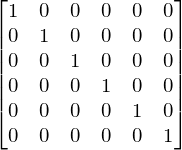

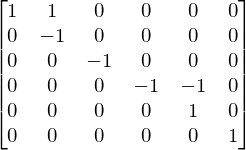

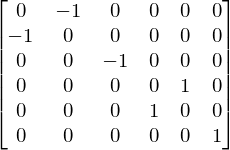

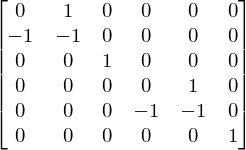

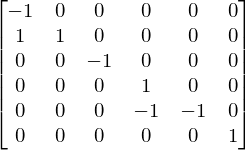

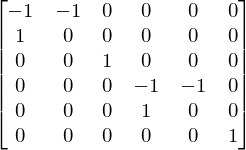

In [2]:
########################################
G=SymmetricGroup(3)
D=regular_representation(G)
H=DihedralGroup(4)
K=rho(H)
#n=D[G[0]].shape[0]
#i=0
M=reducir(D,G)
for g in list(G.elements):
    display(M.inv()*D[g]*M)

In [15]:
a=5+I
b=5+I
expand(a*b)

In [1]:
from sympy import as sp
import random
from sympy.combinatorics.named_groups import SymmetricGroup
init_printing()
from sympy.physics.quantum.dagger import Dagger
from sympy.combinatorics.named_groups import DihedralGroup
from sympy.matrices import Matrix
from sympy.matrices import GramSchmidt
from sympy import BlockMatrix
from sympy import Symbol, I
def ublock(M,N):
class MatrixRepresentation:
    """
    A class of matricial representation of a group.
    """
    def __init__(self, d, G, n):
        self.map = d
        self.group = G
        self.degree = n
    
    def character(self):
        """
        A dictionary that saved the trace of for every element in d.
        """
        return dict([(g, self.map[g].trace()) for g in self.group.elements])

    def is_unitary(self):
        """
        Return True if every element in d is unitary, False in otherwise.
        """
        for g in self.group.elements:
            if sp.expand(self.map[g].H*self.map[g]) != sp.eye(self.degree):
                return False
        else:
            return True
def rho(G):
    D={}
    for g in list(G.elements):
        n=max(g)+1
        M=eye(n)
        N=eye(n)
        for i in range(0,n):
            for j in range(0,n):
                N[i,j]=M[g(i),j]
        D[g]=N
    return MatrixRepresentation(D,G,n)


def _char_f(G, g, i, j):
    elems = list(G.elements)
    if g*elems[i] == elems[j]:
        return 1
    else:
        return 0


def regular_representation(G):
    elems = list(G.elements)
    n = len(elems)
    mydict = {}
    for g in elems:
        mydict[g] = sp.ImmutableMatrix(sp.Matrix(n, n,
                                                 lambda i, j:
                                                 _char_f(G, g, i, j)))
    return MatrixRepresentation(mydict, G, n)


In [5]:
from sympy import *
import random
from sympy.combinatorics.named_groups import SymmetricGroup
init_printing()
from sympy.physics.quantum.dagger import Dagger
from sympy.combinatorics.named_groups import DihedralGroup
from sympy.matrices import Matrix
from sympy.matrices import GramSchmidt
from sympy import BlockMatrix
from sympy import Symbol, I
G=SymmetricGroup(3)
def _char_f(G, g, i, j):
    elems = list(G.elements)
    if elems[i] == elems[j]:
        return 1
    else:
        return 0

In [24]:
G=SymmetricGroup(3)
def char1(G, g, i, j):
    for h in g:
    if g*elems[i] == elems[j]:
        return 1
    else:
        return 0

In [1]:
from sympy import *
import random
from sympy.combinatorics.named_groups import SymmetricGroup
init_printing()
from sympy.physics.quantum.dagger import Dagger
from sympy.combinatorics.named_groups import DihedralGroup
from sympy.matrices import Matrix
from sympy.matrices import GramSchmidt
from sympy import BlockMatrix
from sympy import Symbol, I
from sympy import radsimp
from sympy.simplify.radsimp import collect_sqrt

def es_representacion(D,G):
    for g in list(G.elements):
        for h in list(G.elements):
            if (D[g*h]!=D[g]*D[h]):
                return False
            if (g*h == G.identity()):
                if (D[h] != D[g].inv()):
                    return False
    if (D[G.identity()]!=eye(D[G[0]].shape[0])):
        return False
    else:
        return True
def ublock(M,N):
    """ublock hace una matriz diagonal por bloques con dos matrices dadas"""
    m=M.shape[0]
    n=N.shape[0]
    l=m+n
    L=zeros(l,l)
    for i in range(l):
        for j in range(l):
            if (i<m and j<m):
                L[i,j]=M[i,j]
            if (i>=m and j>=m):
                L[i,j]=N[i-m,j-m]
    return L
def MTS(A):
    """Calcula una matriz triangular superior"""
    A1=A
    n=A.shape[0]
    V=eye(n)
    for i in range(0,n):
        C=eye(n)
        C[i,i]=1/sqrt(A1[i,i])
        for j in range(i+1,n):
            C[i,j] = -(1/A1[i,i])*A1[i,j]
        V=V*C
        V=expand(V)
        A1=Dagger(C)*A1*C
        A1=expand(A1)
    return V
def regular_representation(G):
    elems = list(G.elements)
    n = len(elems)
    def char_function(i, j):
        if elems[i]*g == elems[j]:
            return 1
        else:
            return 0
    mydict = {}
    for g in elems:
        mydict[g] = Matrix(n, n, char_function)
    return mydict
def rho(G):
    D={}
    for g in list(G.elements):
        n=max(g)+1
        M=eye(n)
        N=eye(n)
        for i in range(0,n):
            for j in range(0,n):
                N[i,j]=M[g(i),j]
        D[g]=N
    return D
def unit(G,D):
    """Hace unitaria la representación"""
    n=D[G[0]].shape[0]
    A=zeros(n,n)
    for g in D:
        J=Dagger(D[g])*D[g]
        J=expand(J)
        A=J+A
    C=MTS(A)
    M = {}
    for g in list(G.elements):
        M[g]=(C.inv())*D[g]*C
    return M
def ME(G,Ers,D):
    """Forma las matrices a las cuales el libro de Dixon llama "E" """
    """La matriz E conmuta con todo elemento de la representación"""
    a=D[G[0]].shape[0]
    E=zeros(a,a)
    R=unit(G,D)
    for g in R:
        E=E+(Dagger(R[g])*Ers*R[g])
    E=(sympify(1)/a)*E
    E=expand(E)
    return E
def irreducible(G,D):
    """Determina si una representación es irreducible"""
    """En caso de no serlo, regresa la matriz no escalar que conmuta"""
    """con todos los elementos de la representación"""
    n=D[G[0]].shape[0]
    N=eye(n)
    for r in range(0,n):
        for s in range(0,n):
            H=zeros(n)        
            if (n-1-r==n-1-s):
                H[n-1-r,n-1-r]=1
            else:
                if (n-1-r>n-1-s):
                    H[n-1-r,n-1-s]=1
                    H[n-1-s,n-1-r]=1
                else:
                    H[n-1-r,n-1-s]=1*I
                    H[n-1-s,n-1-r]=-1*I
            M=ME(G,H,D)
            if (M!=M[0,0]*N):
                return M
    else:
        return True
##########################################
def block(M):
    v=[]
    c1=0
    i=0
    n=M.shape[0]
    while (c1<n):
        c=0
        for j in range(c1,n):
            if (M[i,j]!=0 or M[j,i]!=0):
                if (Abs(i-j)>c):
                    c=Abs(i-j)
        if (c==0):
            v.append(c1)
            c1=c1+1
            i=c1
        else:
            bloques=False
            while (bloques==False):
                bloques=True
                for j in range(c1,c1+c+1):
                    for k in range(c1+c+1,n):
                         if (M[j,k]!=0 or M[k,j]!=0):
                            if (Abs(i-k)>c):
                                c=Abs(i-k)
            v.append(c1+c)
            c1=c1+c+1
            i=c1
    return v
def blockI(M,n,i):
    a=M.shape[0]
    N=eye(n)
    for j in range(0,a):
        for k in range(0,a):
            N[j+i,k+i]=M[j,k]
    return N
def reducir(D,G):
    M=irreducible(G,D)
    b=D[G[0]].shape[0]
    if (M==True):
        return(eye(b))
    else:
        (P, J) = M.jordan_form()
        P=expand(P)
        w=[]
        for g in D:
            w.append(block(P.inv()*D[g]*P))
        l=len(w[0])
        au=w[0]
        for g in w:
            if (len(g)<l):
                l=len(g)
                au=g
        e=0
        U=P
        for a in au:
            D1={}
            for g in list(G.elements):
                D1[g]=(P.inv()*D[g]*P)[e:a+1,e:a+1]
            if (es_representacion(D1,G)==True):
                U=U*blockI(reducir(D1,G),b,e)
            else:
                return "El diccionario D1 no es representación"
            e=a+1
        return U
def delta(G):
    D={}
    L=list(G.elements)
    n=len(L)
    for g in L:
        N=zeros(n)
        M=eye(n)
        for i in range(0,n):
            for j in range(0,n):
                if (L[j]*g==L[i]):
                    for k in range(0,n):
                        N[k,j]=M[k,i]
        D[g]=N
    return D

        #v=block(P.inv()*D[G[0]]*P)
        #I=[]
        #s=0
        #for g in v:
        #    I.append(s)
        #    s=s+g.shape[0]
        #U=blockI(P,n,i)
        #for a in range(0,len(v)):
        #    D1={}
        #    for g in list(G.elements):
        #        if (g!=G.identity()):
        #            D1[g]=block(P.inv()*D[g]*P)[a]
        #        else:
        #            D1[g]=eye(v[a].shape[0])
        #    U=(U*blockI(reducir(D1,n,i+a,G))).simplify()
        #return U


True

True

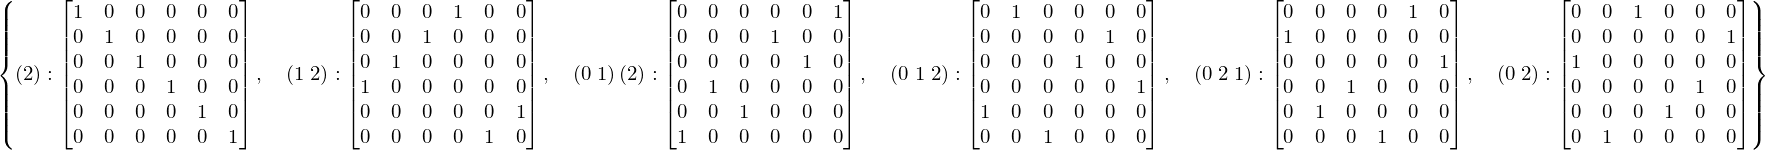

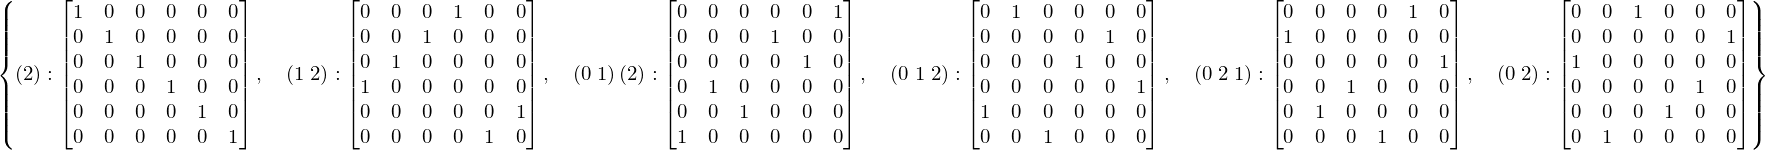

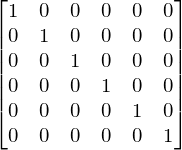

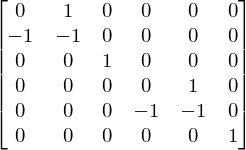

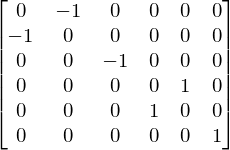

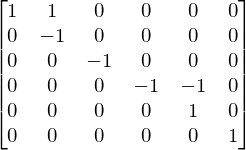

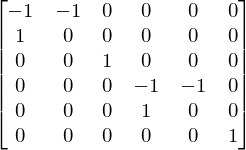

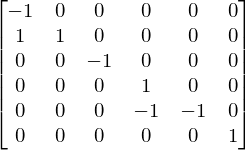

In [3]:
G=SymmetricGroup(3)
D=regular_representation(G)
D1=unit(G,D)
L=list(G.elements)
display(L)
display(es_representacion(D,G))
display(es_representacion(D,G))
#D1=unit(G,D)
display(D)
display(D1)
P=reducir(D,G)
for g in D:
    display(P.inv()*D[g]*P)